In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [2]:
df = pd.read_csv('movies_dataset.csv')

In [3]:
df

,Unnamed: 0,User_Id,Movie_Name,Rating,Genre
0,0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,3,1,Underground (1995),5.0,Comedy|Drama|War
4,4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance
...,...,...,...,...,...
25000090,25000090,162541,Ratatouille (2007),4.5,Animation|Children|Drama
25000091,25000091,162541,Bee Movie (2007),2.5,Animation|Comedy
25000092,25000092,162541,Alvin and the Chipmunks (2007),2.0,Children|Comedy
25000093,25000093,162541,"Dark Knight, The (2008)",4.0,Action|Crime|Drama|IMAX


In [4]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df

,User_Id,Movie_Name,Rating,Genre
0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,1,Underground (1995),5.0,Comedy|Drama|War
4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance
...,...,...,...,...
25000090,162541,Ratatouille (2007),4.5,Animation|Children|Drama
25000091,162541,Bee Movie (2007),2.5,Animation|Comedy
25000092,162541,Alvin and the Chipmunks (2007),2.0,Children|Comedy
25000093,162541,"Dark Knight, The (2008)",4.0,Action|Crime|Drama|IMAX


In [6]:
df["Year"] = df["Movie_Name"].str.extract(r"\((\d{4})\)").astype(float)
df["Movie_Name"] = df["Movie_Name"].str.replace(r"\s*\(\d{4}\)", "", regex=True)

In [7]:
df

,User_Id,Movie_Name,Rating,Genre,Year
0,1,Pulp Fiction,5.0,Comedy|Crime|Drama|Thriller,1994.0
1,1,Three Colors: Red (Trois couleurs: Rouge),3.5,Drama,1994.0
2,1,Three Colors: Blue (Trois couleurs: Bleu),5.0,Drama,1993.0
3,1,Underground,5.0,Comedy|Drama|War,1995.0
4,1,Singin' in the Rain,3.5,Comedy|Musical|Romance,1952.0
...,...,...,...,...,...
25000090,162541,Ratatouille,4.5,Animation|Children|Drama,2007.0
25000091,162541,Bee Movie,2.5,Animation|Comedy,2007.0
25000092,162541,Alvin and the Chipmunks,2.0,Children|Comedy,2007.0
25000093,162541,"Dark Knight, The",4.0,Action|Crime|Drama|IMAX,2008.0


In [8]:
df["Movie_Name"] = df["Movie_Name"].apply(lambda x: re.sub("[\W_]+", " ", x).strip())

In [9]:
movie_counts = df["Movie_Name"].value_counts()
popular_movies = movie_counts[movie_counts >= 50].index

df_small = df[df["Movie_Name"].isin(popular_movies)]

df = df_small.sample(n=10_000_000, random_state=42)

In [10]:
df

,User_Id,Movie_Name,Rating,Genre,Year
10098521,65515,Bill Ted s Excellent Adventure,3.5,Adventure|Comedy|Sci-Fi,1989.0
15159018,98235,Hitchhiker s Guide to the Galaxy The,4.0,Adventure|Comedy|Sci-Fi,2005.0
8493071,55308,Hotel Rwanda,4.5,Drama|War,2004.0
14368167,93074,Once Were Warriors,3.0,Crime|Drama,1994.0
4008587,26392,Clueless,3.0,Comedy|Romance,1995.0
...,...,...,...,...,...
12774716,82637,Alien³ a k a Alien 3,3.0,Action|Horror|Sci-Fi|Thriller,1992.0
14955767,96905,Help The,4.0,Drama,2011.0
20048012,130333,Miller s Crossing,0.5,Crime|Drama|Film-Noir|Thriller,1990.0
19194120,124550,Treasure of the Sierra Madre The,4.0,Action|Adventure|Drama|Western,1948.0


In [11]:
cinema_ratings = df.groupby('Movie_Name')['Rating'].count().reset_index().rename(columns={'Rating': 'count_rating'})

In [12]:
cnt=pd.DataFrame(cinema_ratings).sort_values('count_rating',ascending=False)

In [13]:
cnt

,Movie_Name,count_rating
4116,Forrest Gump,33211
9870,Shawshank Redemption The,33000
8907,Pulp Fiction,32416
9984,Silence of the Lambs The,30137
7175,Matrix The,29429
...,...,...
3937,Final Flight of the Osiris,12
2680,Crooks in Clover a k a Monsieur Gangster Les t...,12
5775,Iron Ladies The Satree lek,12
11245,The Polka King,11


In [14]:
avg_ratings = df.groupby('Movie_Name')['Rating'].mean().reset_index().rename(columns={'Rating': 'avg_rating'})

avg=pd.DataFrame(avg_ratings).sort_values('avg_rating',ascending=False)

In [15]:
avg.head(10)

,Movie_Name,avg_rating
8666,Planet Earth II,4.509132
8665,Planet Earth,4.447439
9870,Shawshank Redemption The,4.411515
1004,Band of Brothers,4.395495
10522,Story of Film An Odyssey The,4.375000
8991,Rabbit Fire,4.370370
11824,Twin Peaks,4.337607
5358,Human,4.329268
4519,Godfather The,4.328058
1433,Black Mirror,4.318878


In [16]:
popularite=avg.merge(cnt,on='Movie_Name')

In [17]:
popularite.head(10)

,Movie_Name,avg_rating,count_rating
0,Planet Earth II,4.509132,438
1,Planet Earth,4.447439,742
2,Shawshank Redemption The,4.411515,33000
3,Band of Brothers,4.395495,555
4,Story of Film An Odyssey The,4.375000,32
5,Rabbit Fire,4.370370,27
6,Twin Peaks,4.337607,117
7,Human,4.329268,41
8,Godfather The,4.328058,21324
9,Black Mirror,4.318878,196


In [18]:
v = popularite["count_rating"]  # количество оценок
R = popularite["avg_rating"]    # средний рейтинг
m = v.quantile(0.90)           # пороговое значение (90-й процентиль)
c = R.mean()                   # средний рейтинг по всем фильмам

popularite['w_score'] = ((v*R) + (m*c)) / (v+m)

In [19]:
popularite["count_rating"].describe()

count    12807.000000
mean       780.822987
std       2058.456712
min         10.000000
25%         46.000000
50%        133.000000
75%        530.000000
max      33211.000000
Name: count_rating, dtype: float64

In [20]:
pop_sort=popularite.sort_values('w_score',ascending=False)

In [21]:
pop_sort

,Movie_Name,avg_rating,count_rating,w_score
2,Shawshank Redemption The,4.411515,33000,4.348711
8,Godfather The,4.328058,21324,4.240671
14,Usual Suspects The,4.277477,22519,4.198363
17,Schindler s List,4.250651,24578,4.179639
22,Fight Club,4.230843,24038,4.159831
...,...,...,...,...
12504,Anaconda,2.094442,2393,2.623592
12216,Wild Wild West,2.332599,4764,2.605674
12628,Speed 2 Cruise Control,1.934343,2178,2.566479
12446,Batman Robin,2.163024,3981,2.527712


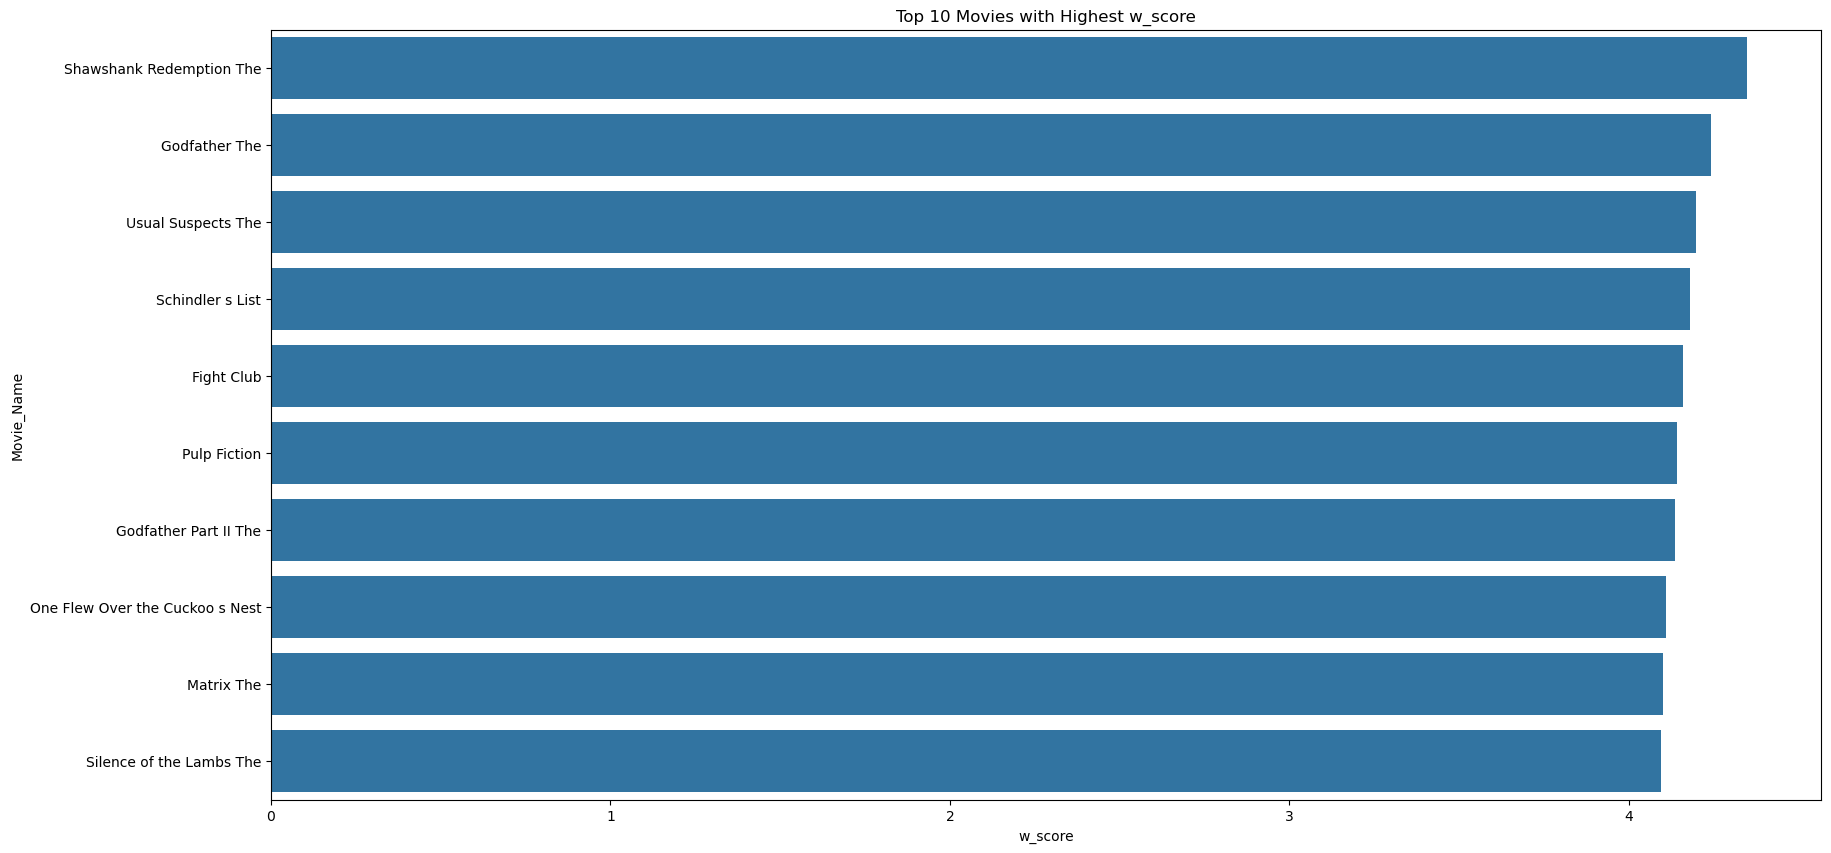

In [22]:
top_10_movies = pop_sort.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='w_score', y='Movie_Name', data=top_10_movies)
plt.xlabel('w_score')
plt.ylabel('Movie_Name')
plt.title('Top 10 Movies with Highest w_score')
plt.show()

In [23]:
new_df=df[df['User_Id'].map(df['User_Id'].value_counts()) > 200]

In [24]:
new_df

,User_Id,Movie_Name,Rating,Genre,Year
10098521,65515,Bill Ted s Excellent Adventure,3.5,Adventure|Comedy|Sci-Fi,1989.0
14368167,93074,Once Were Warriors,3.0,Crime|Drama,1994.0
13474192,87160,Good Morning Vietnam,4.0,Comedy|Drama|War,1987.0
5402155,35058,Deep Impact,2.5,Drama|Sci-Fi|Thriller,1998.0
2472851,16494,Schindler s List,5.0,Drama|War,1993.0
...,...,...,...,...,...
10541172,68362,Casino Royale,4.5,Action|Adventure|Thriller,2006.0
17941262,116260,Sound of Music The,3.0,Musical|Romance,1965.0
17239548,111702,Turbulence,3.0,Action|Thriller,1997.0
12774716,82637,Alien³ a k a Alien 3,3.0,Action|Horror|Sci-Fi|Thriller,1992.0


In [25]:
users_pivot=new_df.pivot_table(index=["User_Id"],columns=["Movie_Name"],values="Rating")
users_pivot.fillna(0,inplace=True)

In [26]:
users_pivot.head()

Movie_Name,1,1 900 06,10,10 000 BC,10 Cloverfield Lane,10 Items or Less,10 Rillington Place,10 Things I Hate About You,10 Years,10 to Midnight,...,batteries not included,burbs The,eXistenZ,iBoy,loudQUIETloud A Film About the Pixies,night Mother,xXx,xXx Return of Xander Cage,xXx State of the Union,À nous la liberté Freedom for Us
User_Id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
def same_movies(movie):
    users_vote_film=users_pivot[movie]
    similar_with=users_pivot.corrwith(users_vote_film)
    similar_with = pd.DataFrame(similar_with, columns=['correlation'])
    print(similar_with)
    df=similar_with.sort_values('correlation',ascending=False).head(10)
    print(df)
    df_sort=df[df['correlation']>0.8]
    return df_sort

In [28]:
same_movies('Your Friends and Neighbors')

                                  correlation
Movie_Name                                   
1                                    0.001807
1 900 06                             0.011299
10                                   0.043883
10 000 BC                           -0.015151
10 Cloverfield Lane                 -0.014164
...                                       ...
night Mother                         0.065144
xXx                                 -0.016127
xXx Return of Xander Cage            0.000137
xXx State of the Union              -0.007352
À nous la liberté Freedom for Us     0.014081

[12807 rows x 1 columns]
                            correlation
Movie_Name                             
Your Friends and Neighbors     1.000000
Last Days of Disco The         0.173093
Affliction                     0.141123
Clockwatchers                  0.140977
In the Company of Men          0.137191
Jesus Son                      0.136039
Triumph of Love The            0.132643
Exotica         

,correlation
Movie_Name,
Your Friends and Neighbors,1.0


### коллаборативное фильтрация

In [30]:
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd


movie_df_matrix = csr_matrix(users_pivot.values)

def find_similar_movies(movie_name, num_neighbors=10):
        model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
        model_knn.fit(movie_df_matrix)
        
        movie_index = users_pivot.columns.get_loc(movie_name)
        
        distances, indices = model_knn.kneighbors(movie_df_matrix[movie_index], n_neighbors=num_neighbors+1)
        similar_indices = indices[0][1:]
        
        list_similar_movies = [users_pivot.columns[idx] for idx in similar_indices]
        similar_movies=pd.DataFrame({"Similar movies to":list_similar_movies})
        return similar_movies

In [31]:
movie = "13 Going on 30"
find_similar_movies(movie)

,Similar movies to
0,Army of Darkness
1,Adventures of Priscilla Queen of the Desert The
2,Jellyfish Meduzot
3,Samurai I Musashi Miyamoto Miyamoto Musashi
4,Benny s Video
5,Night of the Generals The
6,Get Out Your Handkerchiefs Préparez vos mouchoirs
7,Doors The
8,Being There
9,Loaded


In [32]:
def find_favorite_movies(User_id, num_books=10):
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(movie_df_matrix)
    
    user_index = users_pivot.index.get_loc(User_id)
    
    distances, indices = model_knn.kneighbors(movie_df_matrix[user_index], n_neighbors=num_books+1)
    favorite_indices = indices[0][1:]
    
    list_favorite_movies = [users_pivot.columns[idx] for idx in favorite_indices]
    favorite_movies=pd.DataFrame({"favorite movies ":list_favorite_movies})
    return favorite_movies

In [33]:
id = 120
find_favorite_movies(id)

,favorite movies
0,Lawrence of Arabia
1,Collateral
2,I Remember Mama
3,Brand Upon the Brain
4,Ferngully The Last Rainforest
5,Eyes Wide Shut
6,Alice Doesn t Live Here Anymore
7,Big Eyes
8,Legend No 17
9,El Dorado


In [34]:
similarity_score = cosine_similarity(users_pivot.T)

### Рекомендация по жанру

In [36]:
import pandas as pd
import numpy as np

def genre_recommendations(df, genre, n=10):
    genre_movies = df[df['Genre'].str.contains(genre, case=False, na=False)] # Находит связанный жанр игнорируя регистры и пустые значения
    
    movied = genre_movies.groupby('Movie_Name').agg({
        'Rating': ['mean', 'count'], # для рейтинга подсчитывает среднее и количество оценок
        'Genre': 'first',
        'Year': 'first' 
    }).round(2) # округлениче чисел до двух
    
    # Упрощения названия
    movied.columns = ['Avg_Rating', 'Rating_Count', 'Genre', 'Year']
    
    # Сортировка по рейтингу и количеству оценок
    movie_genr = movied.sort_values(['Avg_Rating', 'Rating_Count'], ascending=[False, False])
    
    return movie_genr.head(n)

In [37]:
recommendations = genre_recommendations(new_df, 'Comedy|Crime', 10)

for movie, row in recommendations.iterrows():
    print(f"{movie}")
    print(f"Рейтинг: {row['Avg_Rating']}")

Cold War
Рейтинг: 5.0
Graduation
Рейтинг: 5.0
Revenge
Рейтинг: 5.0
The Perfect Date
Рейтинг: 4.5
Argo
Рейтинг: 4.5
Countdown
Рейтинг: 4.5
Whatever
Рейтинг: 4.5
Rabbit Fire
Рейтинг: 4.38
Godfather The
Рейтинг: 4.34
Shawshank Redemption The
Рейтинг: 4.33


In [38]:
#import joblib

In [39]:
#joblib.dump(users_pivot, 'movie_pivot.pkl')
#joblib.dump(similarity_score, 'movie_similarity.pkl')

In [40]:
#df.to_csv('popular_movies_10_mill.csv', index=False)